# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer, r2_score, root_mean_squared_error

# Import train test split
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from pprint import pprint

# Import KNeighbors Regressor and Classifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Import time
import time

# Import Randomized Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import confusion matrix
from sklearn.metrics import confusion_matrix

# Import kfold
from sklearn.model_selection import KFold

# Import cross val score
from sklearn.model_selection import cross_val_score

# Import math
import math

# Import log2
from math import log2

# Import classification report
from sklearn.metrics import classification_report

# Import pickle
import pickle

np.random.seed(42)

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# path = '/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/'
path = 'data/'
pickle_path = 'pickle/'
results_path = 'results/'

convabuse_filename = 'convabuse_final.csv'
dghs_filename = 'dynamically_generated_hate_speech_dataset_final.csv'
oaa_filename = 'online_abusive_attacks_final.csv'
us2020hs_filename = 'us_elections_2020_hate_speech_final.csv'
mlma_hate_speech_filename = 'MLMA_hate_speech_final.csv'

In [3]:
# Import the datasets
convabuse = pd.read_csv(f'{path}{convabuse_filename}')
convabuse_sample = convabuse.sample(frac=0.3, random_state=42)
dynamically_generated_hate_speech = pd.read_csv(f'{path}{dghs_filename}')
dghs_sample = dynamically_generated_hate_speech.sample(frac=0.3, random_state=42)
online_abusive_attacks = pd.read_csv(f'{path}{oaa_filename}')
online_abusive_attacks_sample = online_abusive_attacks.sample(frac=0.3, random_state=42)
us_elections_2020_hate_speech = pd.read_csv(f'{path}{us2020hs_filename}')
us2020hs_sample = us_elections_2020_hate_speech.sample(frac=0.3, random_state=42)
mlma_hate_speech = pd.read_csv(f'{path}{mlma_hate_speech_filename}')
mlma_hate_speech_sample = mlma_hate_speech.sample(frac=0.3, random_state=42)

In [4]:
convabuse.head()

,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]
convabuse_X_sample = convabuse_sample.drop("abuse_level", axis=1)
convabuse_y_sample = convabuse_sample["abuse_level"]

In [6]:
dynamically_generated_hate_speech.head()

,label,type,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,-1,0,0,0,1,0,0,0,0,0,0
1,1.0,-1,0,0,0,0,0,0,0,0,0,1
2,1.0,-1,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,0,0,0,0,0,0,0,0,0,1


In [7]:
dghs_X = dynamically_generated_hate_speech.drop("label", axis=1)
dghs_y = dynamically_generated_hate_speech["label"]
dghs_X_sample = dghs_sample.drop("label", axis=1)
dghs_y_sample = dghs_sample["label"]

In [8]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [9]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]
online_abusive_attacks_X_sample = online_abusive_attacks_sample.drop("Toxicity", axis=1)
online_abusive_attacks_y_sample = online_abusive_attacks_sample["Toxicity"]

In [10]:
us_elections_2020_hate_speech.head()

,Trump,Biden,HOF
0,1.0,4.0,1
1,4.0,0.0,1
2,0.0,1.0,1
3,1.0,4.0,1
4,4.0,1.0,1


In [11]:
us2020hs_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us2020hs_y = us_elections_2020_hate_speech["HOF"]
us2020hs_X_sample = us2020hs_sample.drop("HOF", axis=1)
us2020hs_y_sample = us2020hs_sample["HOF"]

In [12]:
mlma_hate_speech.head()

,index,directness,shock_annotator_sentiment,anger_annotator_sentiment,confusion_annotator_sentiment,sadness_annotator_sentiment,indifference_annotator_sentiment,disgust_annotator_sentiment,fear_annotator_sentiment,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,abuse_level
0,7463,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,883,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0
2,5524,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,5323,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,12290,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
mlma_hate_speech_X = mlma_hate_speech.drop("abuse_level", axis=1)
mlma_hate_speech_y = mlma_hate_speech["abuse_level"]
mlma_hate_speech_X_sample = mlma_hate_speech_sample.drop("abuse_level", axis=1)
mlma_hate_speech_y_sample = mlma_hate_speech_sample["abuse_level"]

# Linear Modeling

In [14]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
convabuse_X_numeric_sample = convabuse_X_sample.select_dtypes(include=np.number)
dghs_X_numeric = dghs_X.select_dtypes(include=np.number)
dghs_X_numeric_sample = dghs_X_sample.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric_sample = online_abusive_attacks_X_sample.select_dtypes(include=np.number)
us2020hs_X_numeric = us2020hs_X.select_dtypes(include=np.number)
us2020hs_X_numeric_sample = us2020hs_X_sample.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric = mlma_hate_speech_X.select_dtypes(include=np.number)
mlma_hate_speech_X_numeric_sample = mlma_hate_speech_X_sample.select_dtypes(include=np.number)

In [15]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [16]:
# Use standard scaler on the Convabuse X sample data
convabuse_sample_scaler = StandardScaler()
convabuse_X_scaled_sample = convabuse_sample_scaler.fit_transform(convabuse_X_numeric_sample)
convabuse_X_scaled_sample = pd.DataFrame(convabuse_X_scaled_sample, columns=convabuse_X_numeric_sample.columns)

In [17]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dghs_X_scaled = dghs_scaler.fit_transform(dghs_X_numeric)
dghs_X_scaled = pd.DataFrame(dghs_X_scaled, columns=dghs_X_numeric.columns)

In [18]:
# Use standard scaler on the Dynamically Generated Hate Speech X sample data
dghs_sample_scaler = StandardScaler()
dghs_X_scaled_sample = dghs_sample_scaler.fit_transform(dghs_X_numeric_sample)
dghs_X_scaled_sample = pd.DataFrame(dghs_X_scaled_sample, columns=dghs_X_numeric_sample.columns)

In [19]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [20]:
# Use standard scaler on the online abusive attacks X sample data
oaa_sample_scaler = StandardScaler()
oaa_X_scaled_sample = oaa_sample_scaler.fit_transform(online_abusive_attacks_X_numeric_sample)
oaa_X_scaled_sample = pd.DataFrame(oaa_X_scaled_sample, columns=online_abusive_attacks_X_numeric_sample.columns)

In [21]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us2020hs_X_scaled = us2020hs_scaler.fit_transform(us2020hs_X_numeric)
us2020hs_X_scaled = pd.DataFrame(us2020hs_X_scaled, columns=us2020hs_X_numeric.columns)

In [22]:
# Use standard scaler on the US elections 2020 hate speech X sample data
us2020hs_sample_scaler = StandardScaler()
us2020hs_X_scaled_sample = us2020hs_sample_scaler.fit_transform(us2020hs_X_numeric_sample)
us2020hs_X_scaled_sample = pd.DataFrame(us2020hs_X_scaled_sample, columns=us2020hs_X_numeric_sample.columns)

In [23]:
# Use standard scaler on the MLMA hate speech X data
mlma_hate_speech_scaler = StandardScaler()
mlma_hate_speech_X_scaled = mlma_hate_speech_scaler.fit_transform(mlma_hate_speech_X_numeric)
mlma_hate_speech_X_scaled = pd.DataFrame(mlma_hate_speech_X_scaled, columns=mlma_hate_speech_X_numeric.columns)

In [24]:
# Use standard scaler on the MLMA hate speech X sample data
mlma_hate_speech_sample_scaler = StandardScaler()
mlma_hate_speech_X_sample_scaled = mlma_hate_speech_sample_scaler.fit_transform(mlma_hate_speech_X_numeric_sample)
mlma_hate_speech_X_sample_scaled = pd.DataFrame(mlma_hate_speech_X_sample_scaled, columns=mlma_hate_speech_X_numeric_sample.columns)

In [25]:
for columns in [convabuse_X_numeric.columns, dghs_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us2020hs_X_numeric.columns, mlma_hate_speech_X_numeric.columns]:
  print(columns)

Index(['race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')
Index(['type', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['Trump', 'Biden'], dtype='object')
Index(['index', 'directness', 'shock_annotator_sentiment',
       'anger_annotator_sentiment', 'confusion_annotator_sentiment',
       'sadness_annotator_sentiment', 'indifference_annotator_sentiment',
       'disgust_annotator_sentiment', 'fear_annotator_sentiment',
       'race_or_ethnicity', 'gender', 'religion', 'lgbtq', 'nationality',
       'age', 'disability', 'class', 'none'],
      dtype='object')


In [26]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
convabuse_X_train_sample, convabuse_X_test_sample, convabuse_y_train_sample, convabuse_y_test_sample = train_test_split(convabuse_X_scaled_sample, convabuse_y_sample, test_size=0.2, random_state=42)

dghs_X_train, dghs_X_test, dghs_y_train, dghs_y_test = train_test_split(dghs_X_scaled, dghs_y, test_size=0.2, random_state=42)
dghs_X_train_sample, dghs_X_test_sample, dghs_y_train_sample, dghs_y_test_sample = train_test_split(dghs_X_scaled_sample, dghs_y_sample, test_size=0.2, random_state=42)

online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train_sample, online_abusive_attacks_X_test_sample, online_abusive_attacks_y_train_sample, online_abusive_attacks_y_test_sample = train_test_split(oaa_X_scaled_sample, online_abusive_attacks_y_sample, test_size=0.2, random_state=42)

us2020hs_X_train, us2020hs_X_test, us2020hs_y_train, us2020hs_y_test = train_test_split(us2020hs_X_scaled, us2020hs_y, test_size=0.2, random_state=42)
us2020hs_X_train_sample, us2020hs_X_test_sample, us2020hs_y_train_sample, us2020hs_y_test_sample = train_test_split(us2020hs_X_scaled_sample, us2020hs_y_sample, test_size=0.2, random_state=42)

mlma_hate_speech_X_train, mlma_hate_speech_X_test, mlma_hate_speech_y_train, mlma_hate_speech_y_test = train_test_split(mlma_hate_speech_X_scaled, mlma_hate_speech_y, test_size=0.2, random_state=42)
mlma_hate_speech_X_train_sample, mlma_hate_speech_X_test_sample, mlma_hate_speech_y_train_sample, mlma_hate_speech_y_test_sample = train_test_split(mlma_hate_speech_X_sample_scaled, mlma_hate_speech_y_sample, test_size=0.2, random_state=42)

In [27]:
# Get the length of each dataset
convabuse_length = len(convabuse_X_train_sample)
dghs_length = len(dghs_X_train_sample)
online_abusive_attacks_length = len(online_abusive_attacks_X_train_sample)
us2020hs_length = len(us2020hs_X_train_sample)
mlma_hate_speech_length = len(mlma_hate_speech_X_train_sample)

In [28]:
convabuse_log2 = math.ceil(log2(convabuse_length))
convabuse_1_percent = math.ceil(convabuse_length * 0.01)
convabuse_length, convabuse_log2, convabuse_1_percent

(12081, 14, 121)

In [29]:
dghs_log2 = math.ceil(log2(dghs_length))
dghs_1_percent = math.ceil(dghs_length * 0.01)
dghs_length, dghs_log2, dghs_1_percent

(9104, 14, 92)

In [30]:
online_abusive_attacks_log2 = math.ceil(log2(online_abusive_attacks_length))
online_abusive_attacks_1_percent = math.ceil(online_abusive_attacks_length * 0.01)
online_abusive_attacks_length, online_abusive_attacks_log2, online_abusive_attacks_1_percent

(568, 10, 6)

In [31]:
us2020hs_log2 = math.ceil(log2(us2020hs_length))
us2020hs_1_percent = math.ceil(us2020hs_length * 0.01)
us2020hs_length, us2020hs_log2, us2020hs_1_percent

(1271, 11, 13)

In [32]:
mlma_hate_speech_log2 = math.ceil(log2(mlma_hate_speech_length))
mlma_hate_speech_1_percent = math.ceil(mlma_hate_speech_length * 0.01)
mlma_hate_speech_length, mlma_hate_speech_log2, mlma_hate_speech_1_percent

(12805, 14, 129)

In [33]:
# Get the length of 1% of each dataset
convabuse_1_percent = int((len(convabuse_X_train) * 0.01) / 10)
dghs_1_percent = int((len(dghs_X_train) * 0.01) / 10)
online_abusive_attacks_1_percent = int((len(online_abusive_attacks_X_train) * 0.01) / 10)
us2020hs_1_percent = int((len(us2020hs_X_train) * 0.01) / 10)
mlma_hate_speech_1_percent = int((len(mlma_hate_speech_X_train) * 0.01) / 10)
convabuse_1_percent, dghs_1_percent, online_abusive_attacks_1_percent, us2020hs_1_percent, mlma_hate_speech_1_percent

(40, 30, 1, 4, 42)

In [34]:
# Create ranges based on 1% of each dataset length times 10, starting from 1% to 11%
convabuse_k_range = list(range(convabuse_1_percent, convabuse_1_percent * 11, convabuse_1_percent))
dghs_k_range = list(range(dghs_1_percent, dghs_1_percent * 11, dghs_1_percent))
online_abusive_attacks_k_range = list(range(online_abusive_attacks_1_percent, online_abusive_attacks_1_percent * 11, online_abusive_attacks_1_percent))
us2020hs_k_range = list(range(us2020hs_1_percent, us2020hs_1_percent * 11, us2020hs_1_percent))
mlma_hate_speech_k_range = list(range(mlma_hate_speech_1_percent, mlma_hate_speech_1_percent * 11, mlma_hate_speech_1_percent))
convabuse_k_range, dghs_k_range, online_abusive_attacks_k_range, us2020hs_k_range, mlma_hate_speech_k_range

([40, 80, 120, 160, 200, 240, 280, 320, 360, 400],
 [30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [4, 8, 12, 16, 20, 24, 28, 32, 36, 40],
 [42, 84, 126, 168, 210, 252, 294, 336, 378, 420])

In [35]:
knn_regression_results_list = []

In [36]:
knn_classification_results_list = []

## Convabuse Decision Tree

In [37]:
convabuse_y_test.value_counts()

abuse_level
0    2067
2    2058
3    2000
1    1972
4    1971
Name: count, dtype: int64

In [38]:
# Instantiate the KNN classifier for convabuse
convabuse_knn_classifier = KNeighborsClassifier()

# Create the classifier scorer
convabuse_class_scorer = make_scorer(accuracy_score)

# KNN Classifier pipeline for Convabuse dataset
convabuse_knn_pipeline = Pipeline([
    ('knn_classifier', convabuse_knn_classifier)
])

# Set the parameters for Randomized Search for KNN Classifier on the Convabuse dataset
convabuse_knn_param_grid = {
    'knn_classifier__n_neighbors': convabuse_k_range,
    'knn_classifier__weights': ['uniform', 'distance'],
    'knn_classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Classifier on the Convabuse dataset
convabuse_knn_grid_search = GridSearchCV(convabuse_knn_pipeline,
                                          param_grid=convabuse_knn_param_grid,
                                          cv=2,
                                          scoring=convabuse_class_scorer,
                                          verbose=1,
                                          n_jobs=-1, 
                                          error_score='raise')

In [39]:
start_time = time.time()
convabuse_class_scorer = make_scorer(accuracy_score, greater_is_better=True)
convabuse_knn_grid_search.fit(convabuse_X_train_sample, convabuse_y_train_sample)
end_time = time.time()

Fitting 2 folds for each of 80 candidates, totalling 160 fits


In [40]:
print("Best parameters for Convabuse KNN Classifier:", convabuse_knn_grid_search.best_params_)
print("Best score for Convabuse KNN Classifier:", convabuse_knn_grid_search.best_score_)
print("Time taken for Convabuse KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for Convabuse KNN Classifier: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 40, 'knn_classifier__weights': 'uniform'}
Best score for Convabuse KNN Classifier: 0.3297737809296518
Time taken for Convabuse KNN Classifier Randomized Search: 10.055904150009155


In [41]:
# Pickle the convabuse_knn_grid_search
with open(f'{pickle_path}convabuse_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(convabuse_knn_grid_search, f)

In [42]:
# Import the pickled convabuse_knn_grid_search
with open(f'{pickle_path}convabuse_knn_grid_search.pkl', 'rb') as f:
    convabuse_knn_grid_search = pickle.load(f)

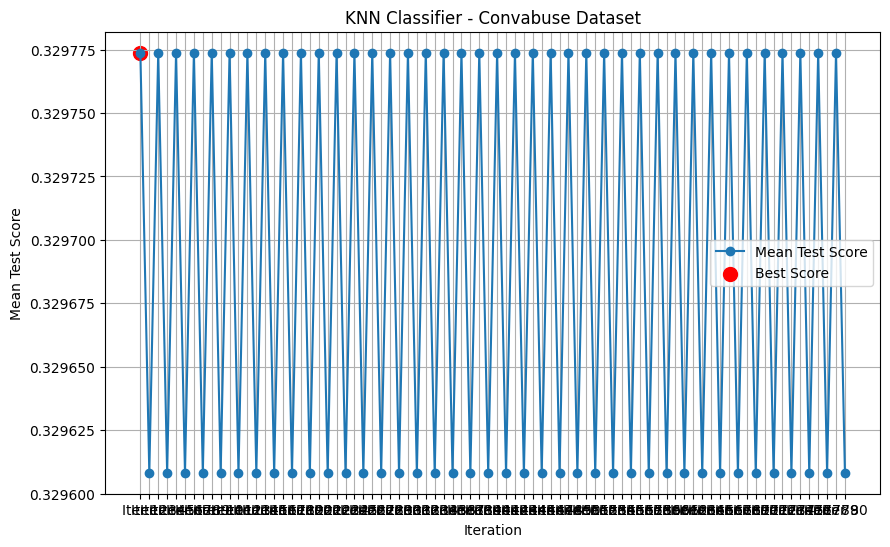

In [43]:
# Plot the accuracy scores for the KNN Classifier on the Convabuse dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(convabuse_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
convabuse_knn_best_score_index = np.argmax(convabuse_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(convabuse_knn_best_score_index, convabuse_knn_grid_search.cv_results_['mean_test_score'][convabuse_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier - Convabuse Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.xticks(range(len(convabuse_knn_grid_search.cv_results_['mean_test_score'])),
           [f"Iter {i+1}" for i in range(len(convabuse_knn_grid_search.cv_results_['mean_test_score']))])
plt.legend()
plt.grid()
plt.show()

In [44]:
# Predict on the test set
convabuse_knn_y_pred = convabuse_knn_grid_search.predict(convabuse_X_test)

In [45]:
# Evaluate the model
convabuse_knn_accuracy = accuracy_score(convabuse_y_test, convabuse_knn_y_pred)
convabuse_knn_f1 = f1_score(convabuse_y_test, convabuse_knn_y_pred, average='weighted')

print("Convabuse KNN Classifier:")
print(f"Best Parameters: {convabuse_knn_grid_search.best_params_}")
print(f"Accuracy: {convabuse_knn_accuracy:.4f}")
print(f"F1 Score: {convabuse_knn_f1:.4f}")

Convabuse KNN Classifier:
Best Parameters: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 40, 'knn_classifier__weights': 'uniform'}
Accuracy: 0.3323
F1 Score: 0.2378


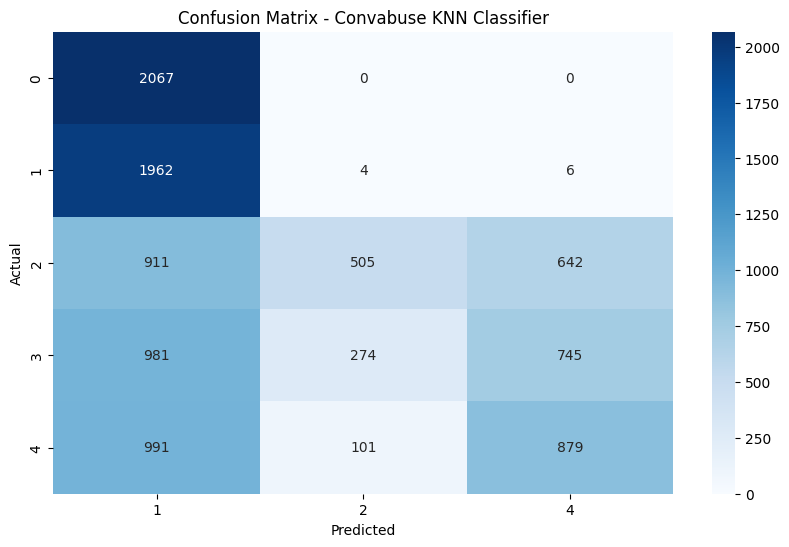

In [46]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(convabuse_y_test, convabuse_knn_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Convabuse KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
# Generate a classification report for the KNN Classifier on the Convabuse dataset
convabuse_knn_report = classification_report(convabuse_y_test, convabuse_knn_y_pred)
print("Classification Report for Convabuse KNN Classifier:")
print(convabuse_knn_report)

Classification Report for Convabuse KNN Classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2067
           1       0.28      0.99      0.44      1972
           2       0.57      0.25      0.34      2058
           3       0.00      0.00      0.00      2000
           4       0.39      0.45      0.41      1971

    accuracy                           0.33     10068
   macro avg       0.25      0.34      0.24     10068
weighted avg       0.25      0.33      0.24     10068



In [48]:
# Append details to the results list
knn_classification_results_list.append((
    "K-Nearest Neighbors",
    "Convabuse",
    "NA",
    "NA",
    convabuse_knn_accuracy,
    convabuse_knn_f1,
    0.0,
    convabuse_knn_grid_search.best_params_
))

## Dynamically Generated Hate Speech Decision Tree

In [49]:
dghs_y_test.value_counts()

label
1.0    3800
0.0    3788
Name: count, dtype: int64

In [50]:
# Instantiate the KNN classifier for the DGHS dataset
dghs_knn_classifier = KNeighborsClassifier()

# Create the classifier scorer
dghs_class_scorer = make_scorer(accuracy_score)

# KNN Classifier pipeline for DGHS dataset
dghs_knn_pipeline = Pipeline([
    ('knn_classifier', dghs_knn_classifier)
])

# Set the parameters for Randomized Search for KNN Classifier on the DGHS dataset
dghs_knn_param_grid = {
    'knn_classifier__n_neighbors': dghs_k_range,
    'knn_classifier__weights': ['uniform', 'distance'],
    'knn_classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Classifier on the DGHS dataset
dghs_knn_grid_search = GridSearchCV(dghs_knn_pipeline,
                                   param_grid=dghs_knn_param_grid,
                                   cv=5,
                                   scoring=dghs_class_scorer,
                                   verbose=1,
                                   n_jobs=-1, 
                                   error_score='raise')

In [51]:
start_time = time.time()
dghs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)
dghs_knn_grid_search.fit(dghs_X_train_sample, dghs_y_train_sample)
end_time = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [52]:
print("Best parameters for Dynamically Generated Hate Speech KNN Classifier:", dghs_knn_grid_search.best_params_)
print("Best score for Dynamically Generated Hate Speech KNN Classifier:", dghs_knn_grid_search.best_score_)
print("Time taken for Dynamically Generated Hate Speech KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for Dynamically Generated Hate Speech KNN Classifier: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 60, 'knn_classifier__weights': 'uniform'}
Best score for Dynamically Generated Hate Speech KNN Classifier: 0.8367763757384845
Time taken for Dynamically Generated Hate Speech KNN Classifier Randomized Search: 10.207861423492432


In [53]:
# Pickle the dghs_knn_grid_search
with open(f'{pickle_path}dghs_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(dghs_knn_grid_search, f)

In [54]:
# Import the pickled dghs_knn_grid_search
with open(f'{pickle_path}dghs_knn_grid_search.pkl', 'rb') as f:
    dghs_knn_grid_search = pickle.load(f)

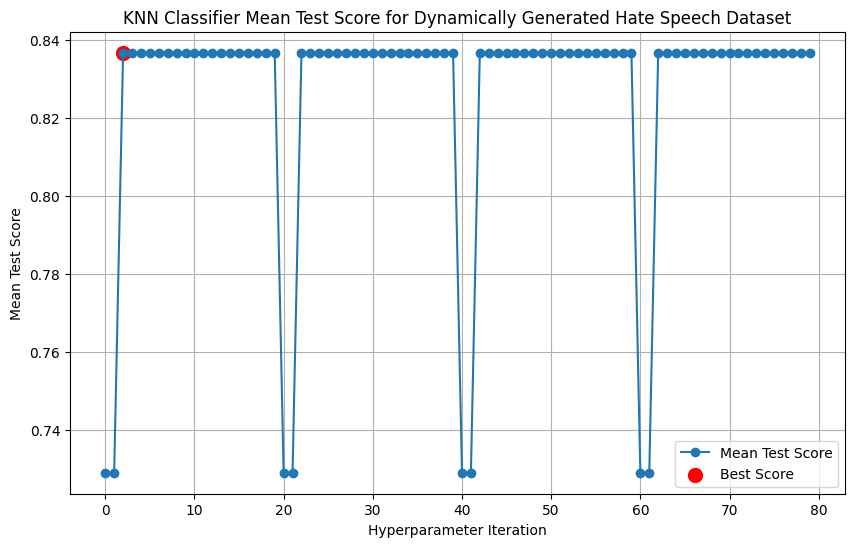

In [55]:
# Plot the accuracy scores for the KNN Classifier on the DGHS dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(dghs_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
dghs_knn_best_score_index = np.argmax(dghs_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(dghs_knn_best_score_index, dghs_knn_grid_search.cv_results_['mean_test_score'][dghs_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier Mean Test Score for Dynamically Generated Hate Speech Dataset')
plt.xlabel('Hyperparameter Iteration')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [56]:
# Predict on the test set
dghs_knn_y_pred = dghs_knn_grid_search.predict(dghs_X_test)

In [57]:
# Evaluate the model
dghs_knn_accuracy = accuracy_score(dghs_y_test, dghs_knn_y_pred)
dghs_knn_f1 = f1_score(dghs_y_test, dghs_knn_y_pred, average='weighted')
print("Dynamically Generated Hate Speech KNN Classifier:")
print(f"Best Parameters: {dghs_knn_grid_search.best_params_}")
print(f"Accuracy: {dghs_knn_accuracy:.4f}")
print(f"F1 Score: {dghs_knn_f1:.4f}")

Dynamically Generated Hate Speech KNN Classifier:
Best Parameters: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 60, 'knn_classifier__weights': 'uniform'}
Accuracy: 0.8349
F1 Score: 0.8303


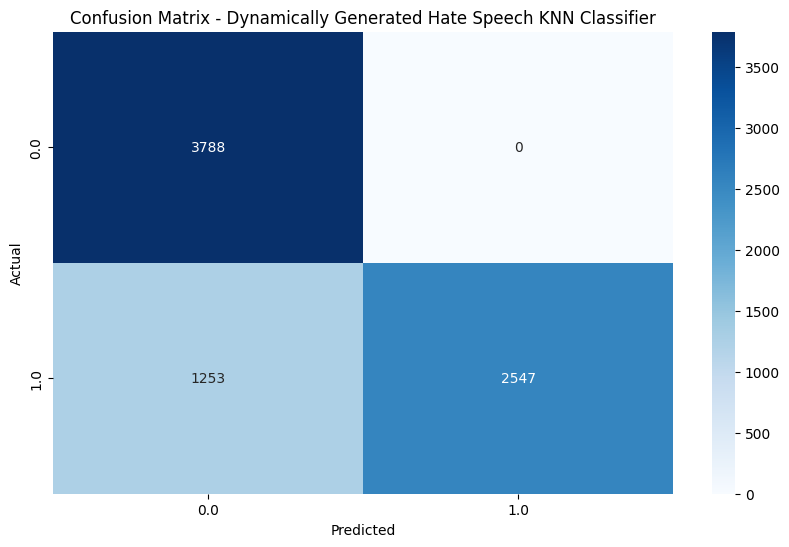

In [58]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(dghs_y_test, dghs_knn_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Dynamically Generated Hate Speech KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [59]:
# Generate a classification report for the KNN Classifier on the DGHS dataset
dghs_knn_report = classification_report(dghs_y_test, dghs_knn_y_pred)
print("Classification Report for Dynamically Generated Hate Speech KNN Classifier:")
print(dghs_knn_report)

Classification Report for Dynamically Generated Hate Speech KNN Classifier:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3788
         1.0       1.00      0.67      0.80      3800

    accuracy                           0.83      7588
   macro avg       0.88      0.84      0.83      7588
weighted avg       0.88      0.83      0.83      7588



In [60]:
# Append details to the results list
knn_classification_results_list.append((
    "K-Nearest Neighbors",
    "Dynamically Generated Hate Speech",
    "NA",
    "NA",
    dghs_knn_accuracy,
    dghs_knn_f1,
    0.0,
    dghs_knn_grid_search.best_params_
))

In [61]:
online_abusive_attacks_y_test.value_counts()

Toxicity
0.0      437
1.0       14
2.0        6
3.0        4
10.0       1
7.0        1
45.0       1
18.0       1
5.0        1
9.0        1
190.0      1
4.0        1
12.0       1
178.0      1
66.0       1
197.0      1
Name: count, dtype: int64

In [62]:
# Instantiate the KNN regressor for the Online Abusive Attacks dataset
oaa_knn_regressor = KNeighborsRegressor()

oaa_reg_scorer = make_scorer(r2_score, greater_is_better=True)

# KNN Regressor pipeline for Online Abusive Attacks dataset
oaa_knn_pipeline = Pipeline([
    ('knn_regressor', oaa_knn_regressor)
])

# Set the parameters for Randomized Search for KNN Regressor on the Online Abusive Attacks dataset
oaa_knn_param_grid = {
    'knn_regressor__n_neighbors': online_abusive_attacks_k_range,
    'knn_regressor__weights': ['uniform', 'distance'],
    'knn_regressor__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Regressor on the Online Abusive Attacks dataset
oaa_knn_grid_search = GridSearchCV(oaa_knn_pipeline,
                                  param_grid=oaa_knn_param_grid,
                                  cv=5,
                                  scoring=oaa_reg_scorer,
                                  verbose=1,
                                  n_jobs=-1, 
                                  error_score='raise')

In [63]:
start_time = time.time()
oaa_knn_grid_search.fit(online_abusive_attacks_X_train_sample, online_abusive_attacks_y_train_sample)
end_time = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [64]:
print("Best parameters for Online Abusive Attacks KNN Classifier:", oaa_knn_grid_search.best_params_)
print("Best score for Online Abusive Attacks KNN Classifier:", oaa_knn_grid_search.best_score_)
print("Time taken for Online Abusive Attacks KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for Online Abusive Attacks KNN Classifier: {'knn_regressor__metric': 'manhattan', 'knn_regressor__n_neighbors': 5, 'knn_regressor__weights': 'uniform'}
Best score for Online Abusive Attacks KNN Classifier: 0.6462575396340144
Time taken for Online Abusive Attacks KNN Classifier Randomized Search: 0.1782076358795166


In [65]:
# Pickle the oaa_knn_grid_search
with open(f'{pickle_path}oaa_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(oaa_knn_grid_search, f)

In [66]:
# Import the pickled oaa_knn_grid_search
with open(f'{pickle_path}oaa_knn_grid_search.pkl', 'rb') as f:
    oaa_knn_grid_search = pickle.load(f)

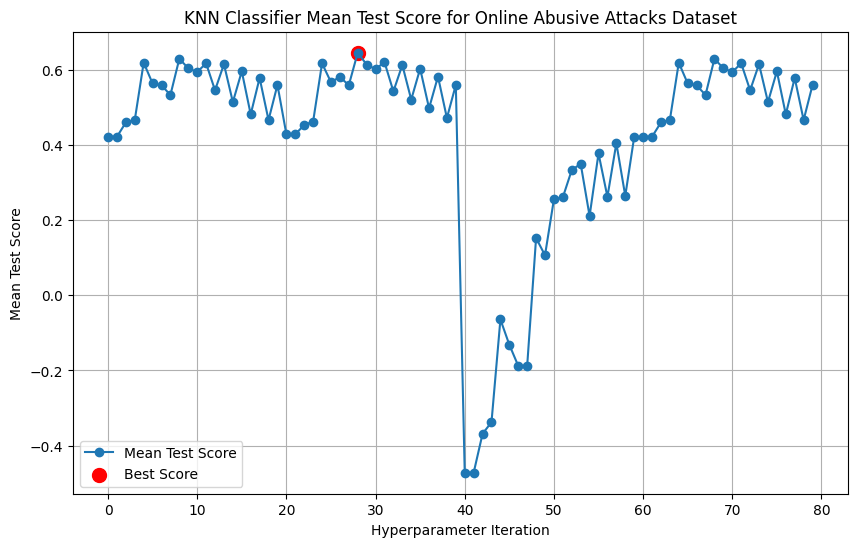

In [67]:
# Plot the accuracy scores for the KNN Classifier on the Online Abusive Attacks dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(oaa_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
oaa_knn_best_score_index = np.argmax(oaa_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(oaa_knn_best_score_index, oaa_knn_grid_search.cv_results_['mean_test_score'][oaa_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier Mean Test Score for Online Abusive Attacks Dataset')
plt.xlabel('Hyperparameter Iteration')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [68]:
# Predict on the test set
oaa_knn_y_pred = oaa_knn_grid_search.predict(online_abusive_attacks_X_test)

In [69]:
# Evaluate the model
oaa_knn_rmse = root_mean_squared_error(online_abusive_attacks_y_test, oaa_knn_y_pred)
oaa_knn_r2 = r2_score(online_abusive_attacks_y_test, oaa_knn_y_pred)
print("Online Abusive Attacks KNN Classifier:")
print(f"Best Parameters: {oaa_knn_grid_search.best_params_}")
print(f"RMSE: {oaa_knn_rmse:.4f}")
print(f"R2 Score: {oaa_knn_r2:.4f}")

Online Abusive Attacks KNN Classifier:
Best Parameters: {'knn_regressor__metric': 'manhattan', 'knn_regressor__n_neighbors': 5, 'knn_regressor__weights': 'uniform'}
RMSE: 4.3175
R2 Score: 0.9216


In [70]:
# Append details to the results list
knn_regression_results_list.append((
    "K-Nearest Neighbors",
    "Online Abusive Attacks",
    oaa_knn_rmse,
    oaa_knn_r2,
    oaa_knn_grid_search.best_params_
))

In [71]:
us2020hs_y_test.value_counts()

HOF
1    545
0    515
Name: count, dtype: int64

In [72]:
# Instantiate the KNN classifier for the US Elections 2020 Hate Speech dataset
us2020hs_knn_classifier = KNeighborsClassifier()

# Create the classifier scorer
us2020hs_class_scorer = make_scorer(accuracy_score)

# KNN Classifier pipeline for US Elections 2020 Hate Speech dataset
us2020hs_knn_pipeline = Pipeline([
    ('knn_classifier', us2020hs_knn_classifier)
])

# Set the parameters for Randomized Search for KNN Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_knn_param_grid = {
    'knn_classifier__n_neighbors': us2020hs_k_range,
    'knn_classifier__weights': ['uniform', 'distance'],
    'knn_classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_knn_grid_search = GridSearchCV(us2020hs_knn_pipeline,
                                       param_grid=us2020hs_knn_param_grid,
                                       cv=5,
                                       scoring=us2020hs_class_scorer,
                                       verbose=1,
                                       n_jobs=-1, 
                                       error_score='raise')

In [73]:
start_time = time.time()
us2020hs_class_scorer = make_scorer(accuracy_score, greater_is_better=True)
us2020hs_knn_grid_search.fit(us2020hs_X_train_sample, us2020hs_y_train_sample)
end_time = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [74]:
print("Best parameters for US Elections 2020 Hate Speech KNN Classifier:", us2020hs_knn_grid_search.best_params_)
print("Best score for US Elections 2020 Hate Speech KNN Classifier:", us2020hs_knn_grid_search.best_score_)
print("Time taken for US Elections 2020 Hate Speech KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for US Elections 2020 Hate Speech KNN Classifier: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 20, 'knn_classifier__weights': 'distance'}
Best score for US Elections 2020 Hate Speech KNN Classifier: 0.6695785085687819
Time taken for US Elections 2020 Hate Speech KNN Classifier Randomized Search: 0.2919187545776367


In [75]:
# Pickle the us2020hs_knn_grid_search
with open(f'{pickle_path}us2020hs_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(us2020hs_knn_grid_search, f)

In [76]:
# Import the pickled us2020hs_knn_grid_search
with open(f'{pickle_path}us2020hs_knn_grid_search.pkl', 'rb') as f:
    us2020hs_knn_grid_search = pickle.load(f)

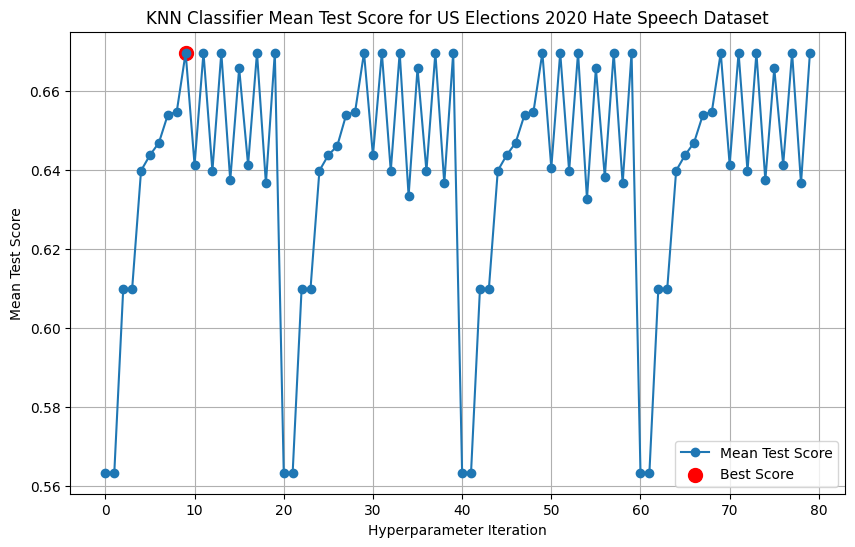

In [77]:
# Plot the accuracy scores for the KNN Classifier on the US Elections 2020 Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(us2020hs_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
us2020hs_knn_best_score_index = np.argmax(us2020hs_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(us2020hs_knn_best_score_index, us2020hs_knn_grid_search.cv_results_['mean_test_score'][us2020hs_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier Mean Test Score for US Elections 2020 Hate Speech Dataset')
plt.xlabel('Hyperparameter Iteration')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [78]:
# Predict on the test set
us2020hs_knn_y_pred = us2020hs_knn_grid_search.predict(us2020hs_X_test)

In [79]:
# Evaluate the model
us2020hs_knn_accuracy = accuracy_score(us2020hs_y_test, us2020hs_knn_y_pred)
us2020hs_knn_f1 = f1_score(us2020hs_y_test, us2020hs_knn_y_pred, average='weighted')
print("US Elections 2020 Hate Speech KNN Classifier:")
print(f"Best Parameters: {us2020hs_knn_grid_search.best_params_}")
print(f"Accuracy: {us2020hs_knn_accuracy:.4f}")
print(f"F1 Score: {us2020hs_knn_f1:.4f}")

US Elections 2020 Hate Speech KNN Classifier:
Best Parameters: {'knn_classifier__metric': 'euclidean', 'knn_classifier__n_neighbors': 20, 'knn_classifier__weights': 'distance'}
Accuracy: 0.6849
F1 Score: 0.6836


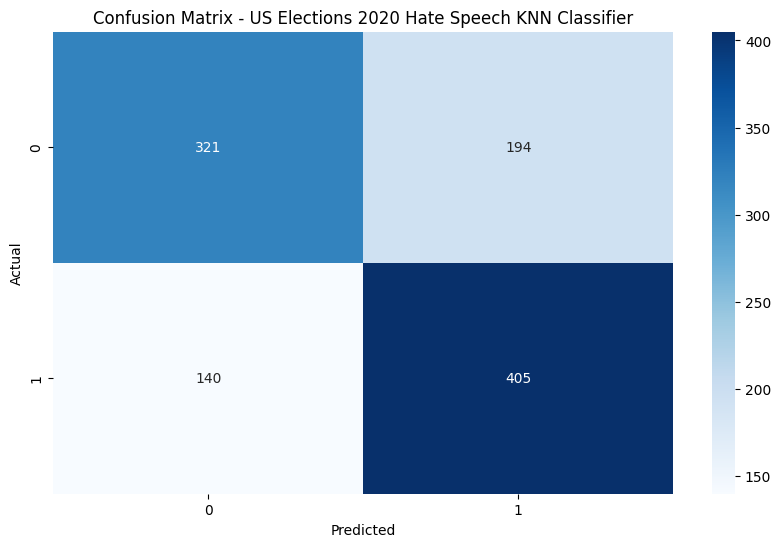

In [80]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(us2020hs_y_test, us2020hs_knn_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - US Elections 2020 Hate Speech KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
# Generate a classification report for the KNN Classifier on the US Elections 2020 Hate Speech dataset
us2020hs_knn_report = classification_report(us2020hs_y_test, us2020hs_knn_y_pred)
print("Classification Report for US Elections 2020 Hate Speech KNN Classifier:")
print(us2020hs_knn_report)

Classification Report for US Elections 2020 Hate Speech KNN Classifier:
              precision    recall  f1-score   support

           0       0.70      0.62      0.66       515
           1       0.68      0.74      0.71       545

    accuracy                           0.68      1060
   macro avg       0.69      0.68      0.68      1060
weighted avg       0.69      0.68      0.68      1060



In [82]:
# Append details to the results list
knn_classification_results_list.append((
    "K-Nearest Neighbors",
    "US Elections 2020 Hate Speech",
    "NA",
    "NA",
    us2020hs_knn_accuracy,
    us2020hs_knn_f1,
    0.0,
    us2020hs_knn_grid_search.best_params_
))

In [83]:
mlma_hate_speech_y_test.value_counts()

abuse_level
4    2695
0    2690
3    2680
2    2607
Name: count, dtype: int64

In [84]:
# Instantiate the KNN classifier for the MLMA Hate Speech dataset
mlma_hate_speech_knn_classifier = KNeighborsClassifier()

# Create the classifier scorer
mlma_hate_speech_class_scorer = make_scorer(accuracy_score)

# KNN Classifier pipeline for MLMA Hate Speech dataset
mlma_hate_speech_knn_pipeline = Pipeline([
    ('knn_classifier', mlma_hate_speech_knn_classifier)
])

# Set the parameters for Randomized Search for KNN Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_knn_param_grid = {
    'knn_classifier__n_neighbors': mlma_hate_speech_k_range,
    'knn_classifier__weights': ['uniform', 'distance'],
    'knn_classifier__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

# Grid Search for KNN Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_knn_grid_search = GridSearchCV(mlma_hate_speech_knn_pipeline,
                                                param_grid=mlma_hate_speech_knn_param_grid,
                                                cv=5,
                                                scoring=mlma_hate_speech_class_scorer,
                                                verbose=1,
                                                n_jobs=-1, 
                                                error_score='raise')


In [85]:
start_time = time.time()
mlma_hate_speech_class_scorer = make_scorer(accuracy_score, greater_is_better=True)
mlma_hate_speech_knn_grid_search.fit(mlma_hate_speech_X_train_sample, mlma_hate_speech_y_train_sample)
end_time = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [86]:
print("Best parameters for MLMA Hate Speech KNN Classifier:", mlma_hate_speech_knn_grid_search.best_params_)
print("Best score for MLMA Hate Speech KNN Classifier:", mlma_hate_speech_knn_grid_search.best_score_)
print("Time taken for MLMA Hate Speech KNN Classifier Randomized Search:", end_time - start_time)

Best parameters for MLMA Hate Speech KNN Classifier: {'knn_classifier__metric': 'manhattan', 'knn_classifier__n_neighbors': 378, 'knn_classifier__weights': 'distance'}
Best score for MLMA Hate Speech KNN Classifier: 0.9383834439672004
Time taken for MLMA Hate Speech KNN Classifier Randomized Search: 18.145310878753662


In [87]:
# Pickle the mlma_hate_speech_knn_grid_search
with open(f'{pickle_path}mlma_hate_speech_knn_grid_search.pkl', 'wb') as f:
    pickle.dump(mlma_hate_speech_knn_grid_search, f)

In [88]:
# Import the pickled mlma_hate_speech_knn_grid_search
with open(f'{pickle_path}mlma_hate_speech_knn_grid_search.pkl', 'rb') as f:
    mlma_hate_speech_knn_grid_search = pickle.load(f)

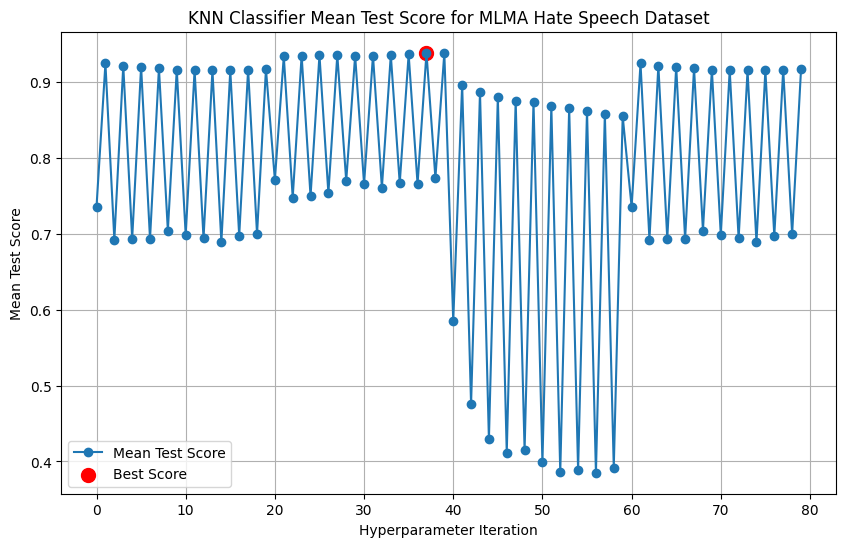

In [89]:
# Plot the accuracy scores for the KNN Classifier on the MLMA Hate Speech dataset for all iterations
plt.figure(figsize=(10, 6))
plt.plot(mlma_hate_speech_knn_grid_search.cv_results_['mean_test_score'], marker='o', label='Mean Test Score')

# Plot the best score as a red x
mlma_hate_speech_knn_best_score_index = np.argmax(mlma_hate_speech_knn_grid_search.cv_results_['mean_test_score'])
plt.scatter(mlma_hate_speech_knn_best_score_index, mlma_hate_speech_knn_grid_search.cv_results_['mean_test_score'][mlma_hate_speech_knn_best_score_index], color='red', s=100, label='Best Score')

plt.title('KNN Classifier Mean Test Score for MLMA Hate Speech Dataset')
plt.xlabel('Hyperparameter Iteration')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid()
plt.show()

In [90]:
# Predict on the test set
mlma_hate_speech_knn_y_pred = mlma_hate_speech_knn_grid_search.predict(mlma_hate_speech_X_test)

  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Fornesus Powered\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session

In [91]:
# Evaluate the model
mlma_hate_speech_knn_accuracy = accuracy_score(mlma_hate_speech_y_test, mlma_hate_speech_knn_y_pred)
mlma_hate_speech_knn_f1 = f1_score(mlma_hate_speech_y_test, mlma_hate_speech_knn_y_pred, average='weighted')
print("MLMA Hate Speech KNN Classifier:")
print(f"Best Parameters: {mlma_hate_speech_knn_grid_search.best_params_}")
print(f"Accuracy: {mlma_hate_speech_knn_accuracy:.4f}")
print(f"F1 Score: {mlma_hate_speech_knn_f1:.4f}")

MLMA Hate Speech KNN Classifier:
Best Parameters: {'knn_classifier__metric': 'manhattan', 'knn_classifier__n_neighbors': 378, 'knn_classifier__weights': 'distance'}
Accuracy: 0.9513
F1 Score: 0.9512


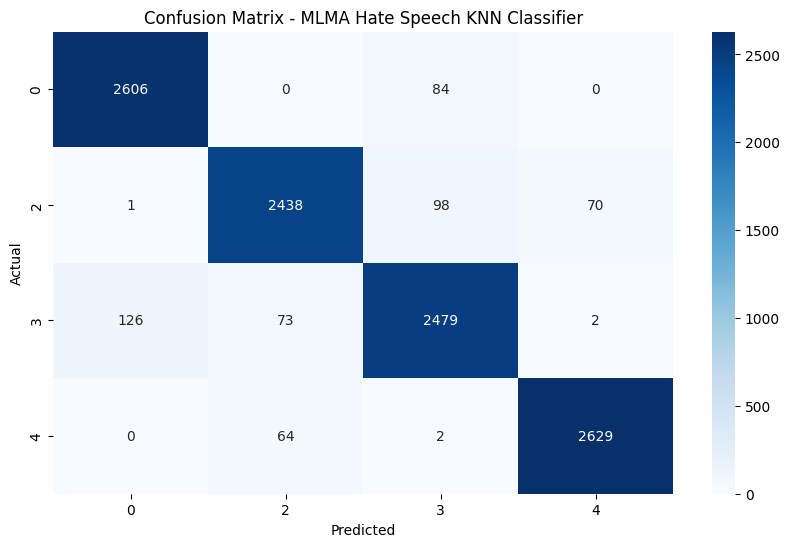

In [92]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mlma_hate_speech_y_test, mlma_hate_speech_knn_y_pred, rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - MLMA Hate Speech KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [93]:
# Generate a classification report for the KNN Classifier on the MLMA Hate Speech dataset
mlma_hate_speech_knn_report = classification_report(mlma_hate_speech_y_test, mlma_hate_speech_knn_y_pred)
print("Classification Report for MLMA Hate Speech KNN Classifier:")
print(mlma_hate_speech_knn_report)  

Classification Report for MLMA Hate Speech KNN Classifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2690
           2       0.95      0.94      0.94      2607
           3       0.93      0.93      0.93      2680
           4       0.97      0.98      0.97      2695

    accuracy                           0.95     10672
   macro avg       0.95      0.95      0.95     10672
weighted avg       0.95      0.95      0.95     10672



In [94]:
# Append details to the results list
knn_classification_results_list.append((
    "K-Nearest Neighbors",
    "MLMA Hate Speech",
    "NA",
    "NA",
    mlma_hate_speech_knn_accuracy,
    mlma_hate_speech_knn_f1,
    0.0,
    mlma_hate_speech_knn_grid_search.best_params_
))

## Support Vector Machine Conclusions

In [95]:
knn_regression_results_list

[('K-Nearest Neighbors',
  'Online Abusive Attacks',
  4.31753394494479,
  0.9216273464274056,
  {'knn_regressor__metric': 'manhattan',
   'knn_regressor__n_neighbors': 5,
   'knn_regressor__weights': 'uniform'})]

In [96]:
knn_classification_results_list

[('K-Nearest Neighbors',
  'Convabuse',
  'NA',
  'NA',
  0.33234008740564164,
  0.2378010774143733,
  0.0,
  {'knn_classifier__metric': 'euclidean',
   'knn_classifier__n_neighbors': 40,
   'knn_classifier__weights': 'uniform'}),
 ('K-Nearest Neighbors',
  'Dynamically Generated Hate Speech',
  'NA',
  'NA',
  0.834870848708487,
  0.8302887273632195,
  0.0,
  {'knn_classifier__metric': 'euclidean',
   'knn_classifier__n_neighbors': 60,
   'knn_classifier__weights': 'uniform'}),
 ('K-Nearest Neighbors',
  'US Elections 2020 Hate Speech',
  'NA',
  'NA',
  0.6849056603773584,
  0.6836255783344402,
  0.0,
  {'knn_classifier__metric': 'euclidean',
   'knn_classifier__n_neighbors': 20,
   'knn_classifier__weights': 'distance'}),
 ('K-Nearest Neighbors',
  'MLMA Hate Speech',
  'NA',
  'NA',
  0.9512743628185907,
  0.9512140142913743,
  0.0,
  {'knn_classifier__metric': 'manhattan',
   'knn_classifier__n_neighbors': 378,
   'knn_classifier__weights': 'distance'})]

In [97]:
# Convert the knn_classification_results_list to a DataFrame
knn_classification_summary = pd.DataFrame(knn_classification_results_list, columns=["Model", "Dataset", "Kernel", "Regularization", "Accuracy", "F1-score", "Ratio", "Best Parameters"])
knn_classification_summary

,Model,Dataset,Kernel,Regularization,Accuracy,F1-score,Ratio,Best Parameters
0,K-Nearest Neighbors,Convabuse,NA,NA,0.332340,0.237801,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
1,K-Nearest Neighbors,Dynamically Generated Hate Speech,NA,NA,0.834871,0.830289,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
2,K-Nearest Neighbors,US Elections 2020 Hate Speech,NA,NA,0.684906,0.683626,0.0,"{'knn_classifier__metric': 'euclidean', 'knn_c..."
3,K-Nearest Neighbors,MLMA Hate Speech,NA,NA,0.951274,0.951214,0.0,"{'knn_classifier__metric': 'manhattan', 'knn_c..."


In [98]:
knn_regression_results_list

[('K-Nearest Neighbors',
  'Online Abusive Attacks',
  4.31753394494479,
  0.9216273464274056,
  {'knn_regressor__metric': 'manhattan',
   'knn_regressor__n_neighbors': 5,
   'knn_regressor__weights': 'uniform'})]

In [99]:
# Convert the knn_regression_results_list to a DataFrame
knn_regression_summary = pd.DataFrame(knn_regression_results_list, columns=["Model", "Dataset", "RMSE", "R2", "Best Parameters"])
knn_regression_summary

,Model,Dataset,RMSE,R2,Best Parameters
0,K-Nearest Neighbors,Online Abusive Attacks,4.317534,0.921627,"{'knn_regressor__metric': 'manhattan', 'knn_re..."


In [100]:
knn_classification_summary.to_csv(f"{results_path}/model8_knn-classification-summary.csv", index=False)
knn_regression_summary.to_csv(f"{results_path}/model8_knn-regression-summary.csv", index=False)